In [ ]:
# what is regression?

# regression is a supervised learning algorithm that is used to predict the continuous values.

# linear regression

# linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables.


In [1]:
# we will use the diabetes dataset to predict the progression of diabetes after one year based on the given features.

# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load the dataset from sklearn

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# create a dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [2]:
# add the target variable to the dataframe
df['progression'] = diabetes.target
# check the shape of the dataframe
df.shape

(442, 11)

In [3]:
# lets use bmi as the feature to predict the progression of diabetes

# create the feature and target variable
X = df[['bmi']] #note that we are using a 2D array
y = df['progression']


In [4]:
# load linear regression model from sklearn

from sklearn.linear_model import LinearRegression
# create an instance of the model
lr = LinearRegression()

In [5]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value

In [6]:
X_train[:5]

,bmi
17,0.012117
66,-0.018062
137,0.049840
245,-0.035307
31,-0.065486


In [7]:
y_train[:5]

C:\Users\val-wd\AppData\Local\Temp\ipykernel_6444\1629913615.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:5]


17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: progression, dtype: float64

In [9]:
# fit the model on the training data
lr.fit(X_train, y_train) 
# so regressor worked on the training data and learned the relationship between bmi and progression

LinearRegression()

In [10]:
# make some predictions
y_pred = lr.predict(X_test) # notice we do them on test

In [11]:
# check the accuracy of the model
lr.score(X_test, y_test)

0.23335039815872138

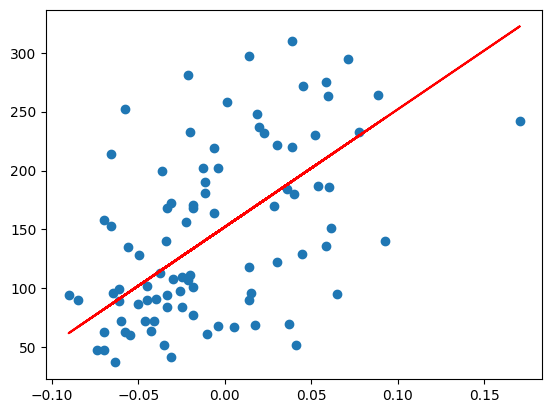

In [12]:
# plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [14]:
# describe the diabetes dataset

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# link to diabetes dataset on UCI machine learning repository
# https://archive.ics.uci.edu/ml/datasets/Diabetes - possibly different datasets



In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [17]:
# as the note says the values have been normalized - mean is 0 and sum of squares in each column is 1

# lets check the correlation between the features and the target variable

df.corr()['progression'].sort_values()

# positive correlation means that as the value of the feature increases the value of the target variable also increases
# negative correlation means that as the value of the feature increases the value of the target variable decreases

# over 0.5 is considered a strong correlation

s3            -0.394789
sex            0.043062
s2             0.174054
age            0.187889
s1             0.212022
s6             0.382483
s4             0.430453
bp             0.441482
s5             0.565883
bmi            0.586450
progression    1.000000
Name: progression, dtype: float64

In [ ]:
# so questions to ask before fitting a model

# has the data been normalized?

# 1. is there a linear relationship between the feature and the target variable?
# 2. is there a correlation between the feature and the target variable?
# 3. is the variance of the feature similar across the target variable?


In [19]:
# lets fit bmi and s5 as the features to predict the progression of diabetes

# create the feature and target variable
X = df[['bmi', 's5']] #note that we are using a 2D array
y = df['progression']

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value
# 42 is arbitrary - just something that we get the same results each time

In [20]:
# create an instance of the model

lr = LinearRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

# make some predictions
y_pred = lr.predict(X_test)


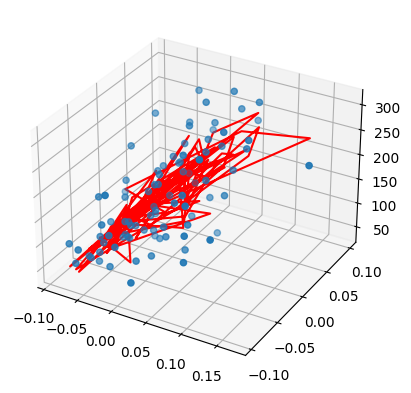

In [21]:
# 3d plot the regression line

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['bmi'], X_test['s5'], y_test)
ax.plot(X_test['bmi'], X_test['s5'], y_pred, color='red')
plt.show()

In [ ]:
# documenttation on LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [22]:
# intercept

lr.intercept_

151.78215201657332

In [23]:
# coefficients

lr.coef_

array([732.10902123, 562.22653533])

In [ ]:
# so the more features we add the more complex the model becomes
# the more complex the model the more likely it is to overfit the data

In [28]:
# lets check mean squared error and r2 score
# so from submodule metrics we will import mean_squared_error and r2_score
# how about absolute error?

# metrics documentation
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 2901.8369415567036
Mean Absolute Error: 43.98824346868295
R2 Score: 0.4522925957397932


In [ ]:
# what is mean squared error?

# mean squared error is a loss function that measures the average of the squares of the errors or deviations.

# why do we use mean squared error? why not mean absolute error?

# mean squared error is differentiable and hence can be used in gradient descent to find the minimum value of the loss function.

In [ ]:
# so square root of mean squared error is called root mean squared error
# symbol for root mean squared error is rmse

In [ ]:
# what is r2 score?

# r2 score is a statistical measure of how close the data are to the fitted regression line.

# r2 score is also known as the coefficient of determination.

In [29]:
def my_fun(x, a=3.1415, b=2.7182):
    return a+b*x # simple linear function

# lets get range of values for x
x = np.arange(0, 10, 0.1) # 0 to 10 with step size of 0.1
y = my_fun(x)
print(y)

[ 3.1415   3.41332  3.68514  3.95696  4.22878  4.5006   4.77242  5.04424
  5.31606  5.58788  5.8597   6.13152  6.40334  6.67516  6.94698  7.2188
  7.49062  7.76244  8.03426  8.30608  8.5779   8.84972  9.12154  9.39336
  9.66518  9.937   10.20882 10.48064 10.75246 11.02428 11.2961  11.56792
 11.83974 12.11156 12.38338 12.6552  12.92702 13.19884 13.47066 13.74248
 14.0143  14.28612 14.55794 14.82976 15.10158 15.3734  15.64522 15.91704
 16.18886 16.46068 16.7325  17.00432 17.27614 17.54796 17.81978 18.0916
 18.36342 18.63524 18.90706 19.17888 19.4507  19.72252 19.99434 20.26616
 20.53798 20.8098  21.08162 21.35344 21.62526 21.89708 22.1689  22.44072
 22.71254 22.98436 23.25618 23.528   23.79982 24.07164 24.34346 24.61528
 24.8871  25.15892 25.43074 25.70256 25.97438 26.2462  26.51802 26.78984
 27.06166 27.33348 27.6053  27.87712 28.14894 28.42076 28.69258 28.9644
 29.23622 29.50804 29.77986 30.05168]


In [30]:
simple_df = pd.DataFrame({'x': x, 'y': y})
simple_df.head()

,x,y
0,0.0,3.14150
1,0.1,3.41332
2,0.2,3.68514
3,0.3,3.95696
4,0.4,4.22878


In [31]:
# lets get X and y
X = simple_df[['x']] # again notice the double brackets because we are using a 2D array
# we could be using multiple columns as features, so we pass a list of columns
# in this case just one column
y = simple_df['y']


In [32]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value

In [33]:
# create an instance of the model
lr = LinearRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

# make some predictions
y_pred = lr.predict(X_test)


In [34]:
# get the intercept and coefficients
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)


Intercept: 3.1414999999999935
Coefficients: [2.7182]


In [36]:
# r 2 score
print('R2 Score:', r2_score(y_test, y_pred)) # so comparing test and predicted values
# so not shocking that the r2 score is 1 because we used linear function to generate the data
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
# again almost no error because we used linear function to generate the data

R2 Score: 1.0
Root Mean Squared Error: 4.061656519258418e-15


In [ ]:
# first lets compare the r2 score and root mean squared error for the diabetes dataset for bmi and s5 separately

# create the feature and target variable
X = df[['bmi']] #note that we are using a 2D array
y = df['progression']

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value
# 42 is arbitrary - just something that we get the same results each time

# create an instance of the model


In [37]:
# lets make a function that will take dataframe and features as input and return r2 score and root mean squared error

def get_r2_rmse(df, features):
    X = df[features] #note that we are using a 2D array
    y = df['progression'] # TODO pass argument for target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression() # TODO pass regression model as argument
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse # we are throwing away the intercept and coefficients and the model

In [38]:
# lets try our function on the diabetes dataset
# we will use all combinations of s3 s5 and bmi

combins = [['s3'], ['s5'], ['bmi'], ['s3', 's5'], ['s3', 'bmi'], ['s5', 'bmi'], ['s3', 's5', 'bmi']]
# we could have done this using itertools
# import itertools
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 1)) # 1 means 1 feature
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 2)) # all combinations of 2 features
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 3)) # all combinations of 3 features

r2_list = []
rmse_list = []
for comb in combins:
    r2, rmse = get_r2_rmse(df, comb)
    print('Features:', comb, 'R2 Score:', r2, 'Root Mean Squared Error:', rmse)
    r2_list.append(r2)
    rmse_list.append(rmse)

# lets plot the r2 score and root mean squared error




Features: ['s3'] R2 Score: 0.18512226947901855 Root Mean Squared Error: 65.70651316868806
Features: ['s5'] R2 Score: 0.38269153958537394 Root Mean Squared Error: 57.18910647072432
Features: ['bmi'] R2 Score: 0.23335039815872138 Root Mean Squared Error: 63.73245584860925
Features: ['s3', 's5'] R2 Score: 0.4039957700968644 Root Mean Squared Error: 56.193601528862594
Features: ['s3', 'bmi'] R2 Score: 0.2897606403164088 Root Mean Squared Error: 61.342936882520796
Features: ['s5', 'bmi'] R2 Score: 0.4522925957397932 Root Mean Squared Error: 53.8687009455092
Features: ['s3', 's5', 'bmi'] R2 Score: 0.45560548367194353 Root Mean Squared Error: 53.70553750374669


In [39]:
# lets create a dataframe with the results
results_df = pd.DataFrame({'features': combins, 'r2': r2_list, 'rmse': rmse_list})
results_df

,features,r2,rmse
0,[s3],0.185122,65.706513
1,[s5],0.382692,57.189106
2,[bmi],0.233350,63.732456
3,"[s3, s5]",0.403996,56.193602
4,"[s3, bmi]",0.289761,61.342937
5,"[s5, bmi]",0.452293,53.868701
6,"[s3, s5, bmi]",0.455605,53.705538


In [42]:
# convert features column to string
# so we can use it as a label
# i used a anonymous function to do this - so we can apply it to each row
# i made a tiny lambda fuction to do this

results_df['features_str'] = results_df['features'].apply(lambda x: "_".join(x))
# convert features column to string
# so we can use it as a label
# i could pass a premade function such as str to do this as well
results_df['simple_str'] = results_df['features'].apply(str)	
results_df

,features,r2,rmse,features_str,simple_str
0,[s3],0.185122,65.706513,s3,['s3']
1,[s5],0.382692,57.189106,s5,['s5']
2,[bmi],0.233350,63.732456,bmi,['bmi']
3,"[s3, s5]",0.403996,56.193602,s3_s5,"['s3', 's5']"
4,"[s3, bmi]",0.289761,61.342937,s3_bmi,"['s3', 'bmi']"
5,"[s5, bmi]",0.452293,53.868701,s5_bmi,"['s5', 'bmi']"
6,"[s3, s5, bmi]",0.455605,53.705538,s3_s5_bmi,"['s3', 's5', 'bmi']"


Text(0.5, 1.0, 'R2 Score for Different Features')

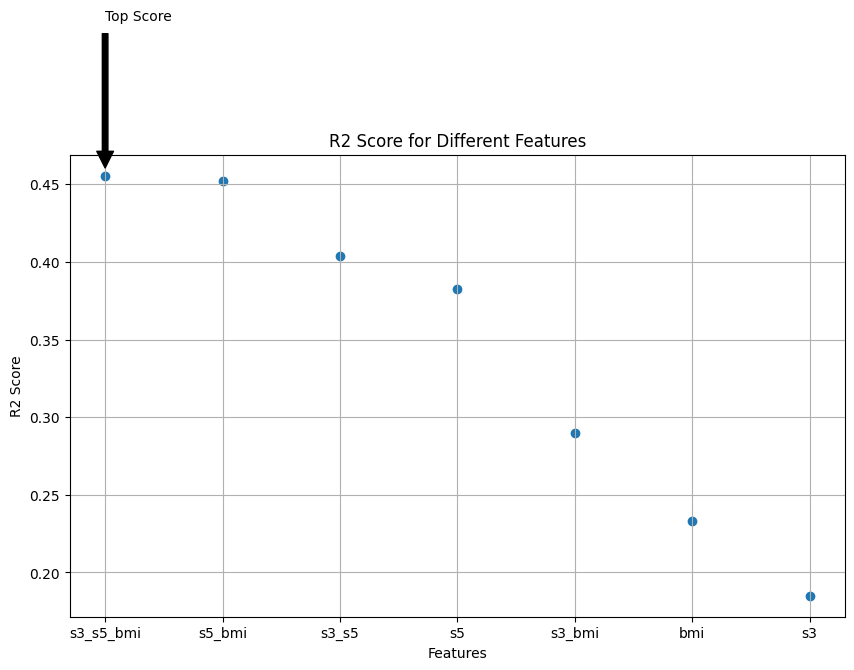

In [48]:
# lets plot the r2 score and root mean squared error
# we will use the results dataframe
# lets sort the dataframe by r2 score
results_df.sort_values(by='r2', ascending=False, inplace=True)

# lets plot the r2 score
plt.figure(figsize=(10, 6))
plt.scatter(results_df['features_str'], results_df['r2'], marker='o')
# add grid
plt.grid()
# add arrow to top score
# i got the location of the top score using the iloc method since first row is the top score
# then added a little bit of offset to the x and y values
plt.annotate('Top Score', xy=(results_df.iloc[0]['features_str'], results_df.iloc[0]['r2']), xytext=(results_df.iloc[0]['features_str'], results_df.iloc[0]['r2']+0.1), arrowprops=dict(facecolor='black', shrink=0.05))
# add graph labels and title
plt.xlabel('Features')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Features')

# lines are not relevant here because x axis is categorical
# we are trying to see which combination of features gives the best r2 score

Text(0.5, 1.0, 'Root Mean Squared Error for Different Features')

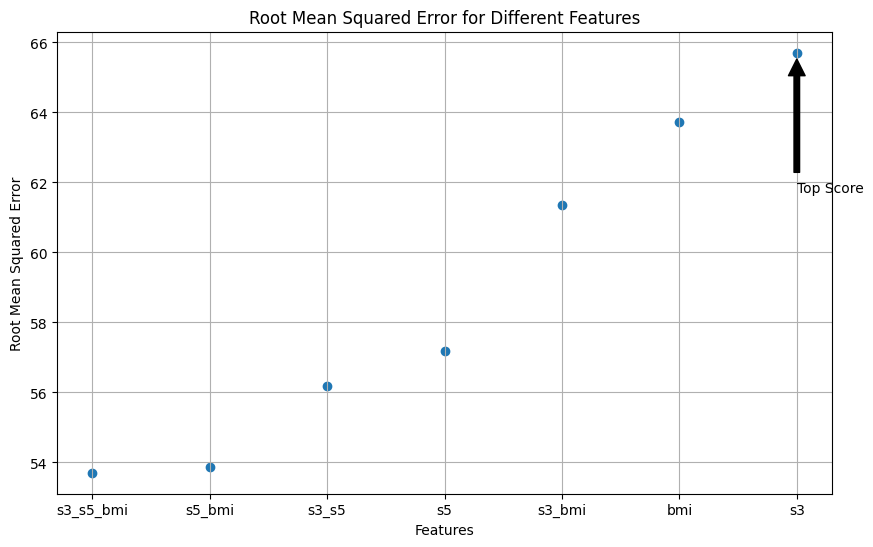

In [51]:
# lets plot the root mean squared error in the same way
# we will use the results dataframe

# lets sort the dataframe by root mean squared error
results_df.sort_values(by='rmse', ascending=True, inplace=True)

# lets plot the root mean squared error
plt.figure(figsize=(10, 6))
plt.scatter(results_df['features_str'], results_df['rmse'], marker='o')
# add grid
plt.grid()
# add arrow to top score
# i got the location of the top score using the iloc method since first row is the top score
# then added a little bit of offset to the x and y values
plt.annotate('Top Score', xy=(results_df.iloc[-1]['features_str'], results_df.iloc[-1]['rmse']), xytext=(results_df.iloc[-1]['features_str'], results_df.iloc[-1]['rmse']-4), arrowprops=dict(facecolor='black', shrink=0.05))
# add graph labels and title
plt.xlabel('Features')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Features')


In [ ]:
# so we want to maximize r2 score and minimize root mean squared error



In [ ]:
# TODO use a different regression model
# available models in sklearn
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# maybe Lasso or Ridge regression



In [ ]:
# try a different data set
# https://scikit-learn.org/stable/datasets/index.html#datasets

In [52]:
# try california housing dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
# import fetch_california_housing from sklearn.datasets
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['target'] = california.target
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
# lets save the dataframe to a csv file
california_df.to_csv('../data/california_housing.csv', index=False)